# Lab  : Decision Trees, Forests and Logistic Regression


# Dataset

###About the Dataset
A malware classifier dataset built with header fields’ values of portable executable files. You can read more about the dataset [here](https://www.kaggle.com/saurabhshahane/classification-of-malwares) 


###Tasks on Dataset Exploration




1. Downloaded and extracted the 'Malwares' dataset from this [link](https://www.kaggle.com/saurabhshahane/classification-of-malwares) 
2. Take a look at the downloaded dataset and explore the various columns/headers present in the dataset. **Note: You are to use the *raw* file throughout this assignment and not the intergrated* one**.   
3. Load the dataset using the pandas library. You can refer to the [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/io.html). 
4. Report the total number of samples and the total number of columns in the dataset.
5. Evaluate the dataset and drop data which hash 'NA' values. Now report the total number of samples and the total number of columns in the dataset. 
6. Plot a bar chart showing the number of samples with the malware present and not present. 
7. Split the dataset into Train and Test sets in a 80:20 ratio. 

In [1]:
# Perform the necessary imports here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
# To access files stored in Google Drive, following block import is used
# If using on a local system, please comment the lines below in this code block

#from google.colab import drive
#drive.mount('/content/MyDrive', force_remount = True)

In [3]:
# Please provide the path where ClaMP_Raw-5184.csv has been stored 
csv_file_path = "C:\\Users\\777\\Desktop\\SEM2\\Machine Learning\\Lab_assignments\\MLLab2\\raw.csv"
#changed the name to raw.csv

In [4]:
# Load the data from csv file into a data frame (1 point)
# Please insert your code here
df = pd.read_csv('raw.csv', delimiter = ',')

In [5]:
# Print the number of instances and attributes in the loaded data frame (1 point)
# Please insert your code here
row,col = df.shape
print('number of instances  =',row)
print('number of attributes =',col)

number of instances  = 5184
number of attributes = 56


In [6]:
# Drop the columns with NaN values (0.5 points)
# Please insert your code here
df = df.dropna(axis = 1, how ='any')

In [7]:
# Print the number of instances and attributes in the loaded data frame after removal of NaN columns (0.5 points)
# Please insert your code here
row,col = df.shape
print('number of instances  =',row)
print('number of attributes =',col)


number of instances  = 5184
number of attributes = 54


<AxesSubplot:title={'center':'number of samples with the malware present(1) and not present(0)'}, xlabel='malware present or not', ylabel='number of samples'>

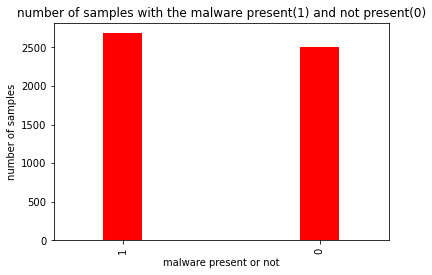

In [8]:
# Plot a bar chart showing the number of samples with the malware present and not present (1 point)
# Please insert your code here
plt.title('number of samples with the malware present(1) and not present(0)')
plt.ylabel('number of samples')
plt.xlabel('malware present or not')
df['class'].value_counts()
df['class'].value_counts().plot(kind='bar',color='red', width=0.2)

In [9]:
#Split the dataset into Train and Test sets in a 80:20 ratio (1 point)
# Please insert your code here
X = df.iloc[:,:53]
Y= df['class']
X_train, X_val, y_train, y_val = train_test_split(X,Y,test_size=0.2)

# Visualizing a Decision Tree


---
Total for this subsection : **3 points**


---



Learn a decision tree classifier which accomodates at least 1000 samples per leaf node based on the train set. Note that this constraint on number of samples per leaf node is set so that the learned tree can be visualized. The tree learned may not be an optimal. Visualize the decision tree learned with such a constraint.

[Text(200.88000000000002, 453.0, 'ImageBase <= 6422528.0\nentropy = 0.999\nsamples = 4147\nvalue = [1999, 2148]\nclass = malware'),
 Text(133.92000000000002, 271.8, 'DllCharacteristics <= 1184.0\nentropy = 0.882\nsamples = 2922\nvalue = [878, 2044]\nclass = malware'),
 Text(66.96000000000001, 90.59999999999997, 'entropy = 0.493\nsamples = 1821\nvalue = [196, 1625]\nclass = malware'),
 Text(200.88000000000002, 90.59999999999997, 'entropy = 0.958\nsamples = 1101\nvalue = [682, 419]\nclass = not malware'),
 Text(267.84000000000003, 271.8, 'entropy = 0.419\nsamples = 1225\nvalue = [1121, 104]\nclass = not malware')]

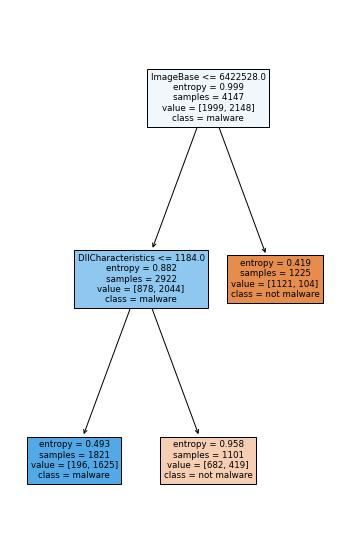

In [10]:
# Please insert your code here
# Step 1: Create a decision tree classifier with atleast 1000 samples per leaf node (1 point)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=1000,  random_state=0)
variables = df.columns.values
variables_X = variables[:53]
y = ['not malware' , 'malware' ]
# Step 2 : Learn the decision tree using the train set (1 point)
clf.fit(X_train , y_train)
# Step 3 : Plot the decision tree learned (1 point)
fig = plt.figure(figsize=(6,10) )
tree.plot_tree(clf , filled=True,  feature_names=variables_X , class_names = y)


# Generating plots
Complete the following function that shall be reused to generate line plots in subsequent sections with approporiate labels in the legend and titles.

---
Total for this subsection : **2 points**

---





In [11]:
def generate_line_plots(xlist1, xlist2, ylist1, ylist2,title1,title2,x_label , y_label):     
    #xlist1 : the list of values that form x axis in first plot
    #list1 : the list of values that form y axis in first plot
    #list2 : the list of values that form x axis in second plot
    #list2 : the list of values that form y axis in second plot
    #egend1 : label corresponding to first plot that will appear as its legend
    #egend2 : label corresponding to second plot that will appear as its legend
    # given_title : title for the plots
    # """
    # Please feel free to add additional parameters to the function definition as necessary
    # But, provide description as given above to any additional parameter you add
    # Please insert your code here
    plt.title(title1)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(ylist1,xlist1,'-o')    
    plt.show()
    plt.title(title2)
    plt.xlabel(x_label)
    plt.ylabel(y_label)  
    plt.plot(ylist2,xlist2,'-o')
    plt.show() 

# Experimentation with various decision tree hyperparameters


---

You will be using the decision tree classifier defined in the sklearn package. You will be experimenting with various hyperparametrs that the package allows control over.

## Minimum number of samples per leaf


---


sklearn provides a flexibility to control the growth of the decision tree by making a split occur only when more than a certain number of samples fall under each leaf. In this section, **comment** on the effect of the various values of the minimum number of samples per leaf node on the train and test set accuracy inferred from their plot.

---
Total for this subsection : **5 points**

---





***********
NO. OF SAMPLES =  50
Train Accuracy: 95.15%
Test Accuracy: 94.99%
***********
NO. OF SAMPLES =  100
Train Accuracy: 93.59%
Test Accuracy: 93.54%
***********
NO. OF SAMPLES =  200
Train Accuracy: 88.96%
Test Accuracy: 86.98%
***********
NO. OF SAMPLES =  500
Train Accuracy: 86.93%
Test Accuracy: 84.96%
***********
NO. OF SAMPLES =  1000
Train Accuracy: 82.66%
Test Accuracy: 81.20%


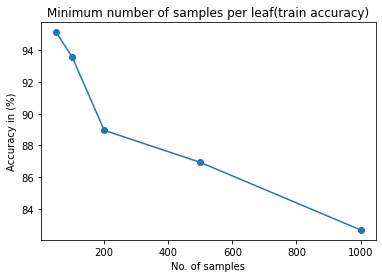

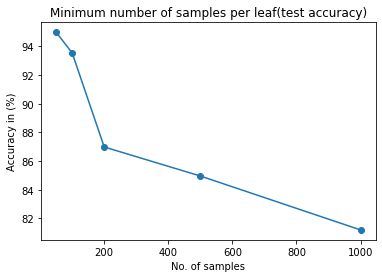

In [12]:
# Experiment with various number of leaf samples
import sklearn.metrics as metrics
num_samples = [50,100,200,500,1000]

# Please insert your code here
x=[]
y=[]
for num in num_samples:
    print('***********')
    # Step 1 : Create a decision tree classifier with minimum number of samples per leaf (1 point)
    clf = DecisionTreeClassifier(criterion="entropy",min_samples_leaf=num,  random_state=0)
    
    # Step 2 : Learn the decision tree using the train set (1 point)
    clf.fit(X_train , y_train)
    print("NO. OF SAMPLES = ",num)
    
    # Step 3 : Compute train accuracy in % (0.5 points)
    ytrain_pred = clf.predict(X_train)
    az=(metrics.accuracy_score(y_train, ytrain_pred))
    a="{:.2%}".format(az)
    x.append(az)
    print("Train Accuracy:",a)
    
    # Step 4 : Compute test accuracy in % (0.5 points)
    y_pred = clf.predict(X_val)
    bz=(metrics.accuracy_score(y_val, y_pred))
    b="{:.2%}".format(bz)
    y.append(bz)
    print("Test Accuracy:",b)
    #print('\n')

    # Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)

p = np.array(x)
num_samples = np.array(num_samples)
q = np.array(y)
#q = q.astype(int)
title1 = 'Minimum number of samples per leaf(train accuracy)'
title2 = 'Minimum number of samples per leaf(test accuracy)'
xlabel = 'No. of samples'
ylabel = 'Accuracy in (%)'
generate_line_plots(p*100 , q*100 , num_samples , num_samples ,title1,title2 , xlabel , ylabel)


### Comments on the effect of minimum number of samples per leaf node on accuracy (1 point)

---

As the number of samples per leaf node increase accuracy of both test and train dataset decreases and if compared , test accuracy is more affected. Training accuracy is better than testing till no. of samples are 500 but as the
no. of samples rises to 1000 test accuracy starts increasing

## Maximum number of leaf nodes in the tree


---


sklearn provides a flexibility to control the growth of the decision tree by constraining the maximum number of leaf nodes a tree can have. In this section, **comment** on the effect of the various values of the maximum number of  leaf nodes allowed on the train and test set accuracy inferred from a plot.

---
Total for this subsection : **5 points**

---

*************
NO. OF SAMPLES =  2
Train Accuracy: 76.32%
Test Accuracy: 81.20%
*************
NO. OF SAMPLES =  3
Train Accuracy: 87.41%
Test Accuracy: 81.20%
*************
NO. OF SAMPLES =  4
Train Accuracy: 91.46%
Test Accuracy: 81.20%
*************
NO. OF SAMPLES =  5
Train Accuracy: 92.86%
Test Accuracy: 81.20%
*************
NO. OF SAMPLES =  6
Train Accuracy: 92.93%
Test Accuracy: 81.20%
*************
NO. OF SAMPLES =  7
Train Accuracy: 92.93%
Test Accuracy: 81.20%
*************
NO. OF SAMPLES =  8
Train Accuracy: 93.27%
Test Accuracy: 81.20%
*************
NO. OF SAMPLES =  9
Train Accuracy: 93.92%
Test Accuracy: 81.20%
*************
NO. OF SAMPLES =  10
Train Accuracy: 95.01%
Test Accuracy: 81.20%


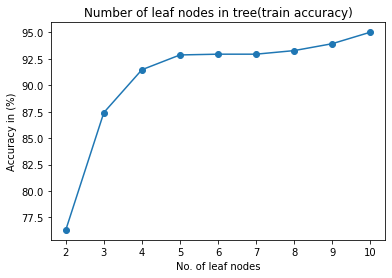

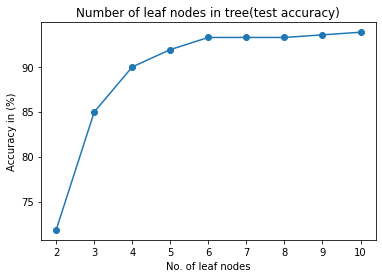

In [13]:
# Experiment with maximum number of leaf nodes

num_leaf_nodes = [i for i in range(2,11)]

# Please insert your code here
x1=[]
y1=[]

for nums in num_leaf_nodes:
    print('*************')
    # Step 1 : Create a decision tree classifier with maximum number of leaf nodes (1 point)
    clf = DecisionTreeClassifier(criterion="entropy",max_leaf_nodes=nums,  random_state=0)
    # Step 2 : Learn the decision tree using the train set (1 point)
    clf.fit(X_train , y_train)
    print("NO. OF SAMPLES = ",nums)
    
    # Step 3 : Compute train accuracy in % (0.5 points)
    ytrain_pred = clf.predict(X_train)
    az=(metrics.accuracy_score(y_train, ytrain_pred))
    a="{:.2%}".format(az)
    x1.append(az)
    print("Train Accuracy:",a)
    # Step 4 : Compute test accuracy in % (0.5 points)
    
    y_pred = clf.predict(X_val)
    bz=(metrics.accuracy_score(y_val, y_pred))
    b1="{:.2%}".format(bz)
    y1.append(bz)
    print("Test Accuracy:",b)
# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
p1 = np.array(x1)
q1 = np.array(y1)
num_leaf_nodes1 = np.array(num_leaf_nodes)
title1 = 'Number of leaf nodes in tree(train accuracy)'
title2 = 'Number of leaf nodes in tree(test accuracy)'
xlabel = 'No. of leaf nodes'
ylabel = 'Accuracy in (%)'
generate_line_plots(p1*100 , q1*100 , num_leaf_nodes1 , num_leaf_nodes1 , title1 , title2 , xlabel , ylabel)


### Comments on the effect of maximum number of leaf nodes allowed on accuracy (1 point)

---
As the number of leaf nodes increases the accuracy of both test and train set firstly rises sharply till the count is 3 for no. of nodes . And then the rise in the graph is little slow. Initially test accuracy is better than train accuracy but as the no. of leaf nodes increases the test accuracy starts decreasing whereas training accuracy increases.

## Maximum depth of the tree


---


sklearn provides a flexibility to control the growth of the decision tree by constraining the maximum depth a tree can grow. In this section, **comment** on the effect of the various values of the maximum tree depth allowed on the train and test set accuracy inferred from a plot.

---
Total for this subsection : **5 points**

---

***************
TREE DEPTH =  1
Train Accuracy: 76.32%
Test Accuracy: 71.84%
***************
TREE DEPTH =  2
Train Accuracy: 87.48%
Test Accuracy: 86.31%
***************
TREE DEPTH =  3
Train Accuracy: 92.84%
Test Accuracy: 91.90%
***************
TREE DEPTH =  4
Train Accuracy: 94.24%
Test Accuracy: 93.83%
***************
TREE DEPTH =  5
Train Accuracy: 94.60%
Test Accuracy: 93.54%
***************
TREE DEPTH =  6
Train Accuracy: 96.07%
Test Accuracy: 94.21%
***************
TREE DEPTH =  7
Train Accuracy: 97.37%
Test Accuracy: 95.56%
***************
TREE DEPTH =  8
Train Accuracy: 97.73%
Test Accuracy: 95.66%
***************
TREE DEPTH =  9
Train Accuracy: 98.36%
Test Accuracy: 96.14%
***************
TREE DEPTH =  10
Train Accuracy: 98.94%
Test Accuracy: 96.43%


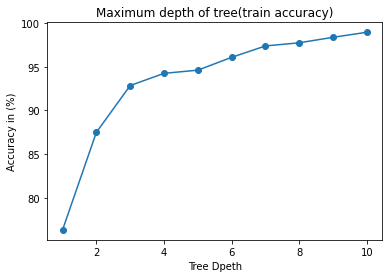

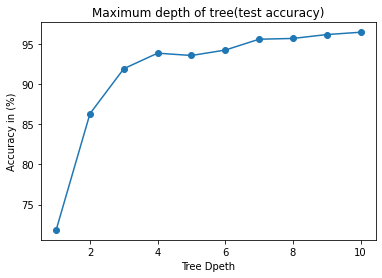

In [14]:
# Experiment with varied tree depths
x2=[]
y2=[]
tree_depths = [i for i in range(1,11)]
# Please insert your code here
for depth in tree_depths:
    print('***************')
    # Step 1 : Create a decision tree classifier with maximum tree depth (1 point)
    clf = DecisionTreeClassifier(criterion="entropy",max_depth=depth,  random_state=0)
    # Step 2 : Learn the decision tree using the train set (1 point)
    clf.fit(X_train , y_train)
    print("TREE DEPTH = ",depth)
    # Step 3 : Compute train accuracy in % (0.5 points)
    ytrain_pred = clf.predict(X_train)
    az=(metrics.accuracy_score(y_train, ytrain_pred))
    a="{:.2%}".format(az)
    x2.append(az)
    print("Train Accuracy:",a)
    # Step 4 : Compute test accuracy in % (0.5 points)
    y_pred = clf.predict(X_val)
    bz=(metrics.accuracy_score(y_val, y_pred))
    b="{:.2%}".format(bz)
    y2.append(bz)
    print("Test Accuracy:",b)

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
p2 = np.array(x2)
num_samples = np.array(num_samples)
q2 = np.array(y2)
tree_depths = np.array(tree_depths)
title1 = 'Maximum depth of tree(train accuracy)'
title2 = 'Maximum depth of tree(test accuracy)'
xlabel = 'Tree Dpeth'
ylabel = 'Accuracy in (%)'
generate_line_plots(p2*100 , q2*100 , tree_depths , tree_depths , title1 , title2 , xlabel , ylabel)


### Comments on the effect of maximum tree depth allowed on accuracy (1 point)

---
Initially when tree depth = 1 , accuracy is very low i.e. appx. 75% but as the depth increases accuracy rises but at depth 10 it becomes constant. Till tree depth is 5 the train accuracy is always more  but after wards test accuracy shows better trends

# Random Forest

---

In this section we will explore the power of ensembles via the Random Forest classifier. We will use the sklearn package's random forest ensemble and study the effect of its hyperparameters on the model performance.

## Instance Bagging


---



To build an ensemble of different trees, a subset of instances are chosen. sklearn provides the flexibility to control the maximum number of instances a subset can have. In this section,  **comment** on the effect of the various values of the maximum number of samples per subset on the train and test set accuracy inferred from their plot.


---
Total for this subsection : **5 points**

---





**************
No. of Instances: 100
Train Accuracy: 95.44%
Test Accuracy: 94.70%
**************
No. of Instances: 150
Train Accuracy: 96.24%
Test Accuracy: 95.56%
**************
No. of Instances: 200
Train Accuracy: 96.43%
Test Accuracy: 95.27%
**************
No. of Instances: 250
Train Accuracy: 96.77%
Test Accuracy: 95.66%
**************
No. of Instances: 300
Train Accuracy: 97.06%
Test Accuracy: 96.43%


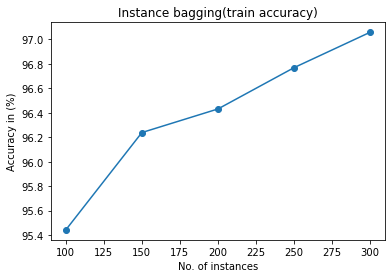

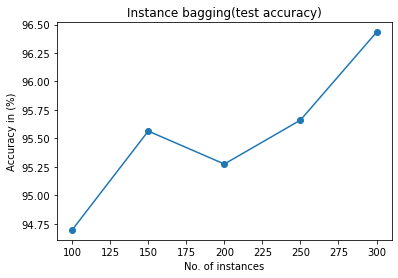

In [15]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
# Instance bagging
a1=[]
b1=[]
num_instances = [100,150,200,250,300]
# Please insert your code here
for num in num_instances:
    print('**************')
    print('No. of Instances:',num)
    # Step 1 : Create a decision tree classifier with maximum number of instances in a subset (1 point)
    clf = RandomForestClassifier( max_samples=num , random_state=0)
    # Step 2 : Learn the decision tree using the train set (1 point)
    clf.fit(X_train, y_train)
    # Step 3 : Compute train accuracy in % (0.5 points)
    ytrain_pred = clf.predict(X_train)
    az=(metrics.accuracy_score(y_train, ytrain_pred))
    a="{:.2%}".format(az)
    a1.append(az)
    print("Train Accuracy:",a)
    # Step 4 : Compute test accuracy in % (0.5 points)
    y_pred = clf.predict(X_val)
    bz=(metrics.accuracy_score(y_val, y_pred))
    b="{:.2%}".format(bz)
    b1.append(bz)
    print("Test Accuracy:",b)

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)

p = np.array(a1)
num_instances = np.array(num_instances)
q = np.array(b1)
title1 = 'Instance bagging(train accuracy)'
title2 = 'Instance bagging(test accuracy)'
xlabel = 'No. of instances'
ylabel = 'Accuracy in (%)'
generate_line_plots(p*100 , q*100 , num_instances , num_instances , title1 , title2 , xlabel , ylabel)

### Comments on the effect of maximum number of instances allowed on accuracy (1 point)

---
Generally , as no. of instances increases , the accuracy also rises. 
And training accuracy is more than testing accuracy 


## Feature Bagging


---



To build an ensemble of different trees, a subset of features are chosen. sklearn provides the flexibility to control the maximum number of features a subset can have. In this section,  **comment** on the effect of the various values of the maximum number of features per subset on the train and test set accuracy inferred from their plot.


---
Total for this subsection : **5 points**

---

***********
No. of features: 10
Train Accuracy: 100.00%
Test Accuracy: 98.17%
***********
No. of features: 20
Train Accuracy: 100.00%
Test Accuracy: 98.65%
***********
No. of features: 30
Train Accuracy: 100.00%
Test Accuracy: 98.36%
***********
No. of features: 40
Train Accuracy: 100.00%
Test Accuracy: 98.26%
***********
No. of features: 50
Train Accuracy: 100.00%
Test Accuracy: 98.07%


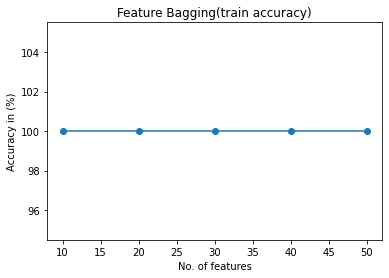

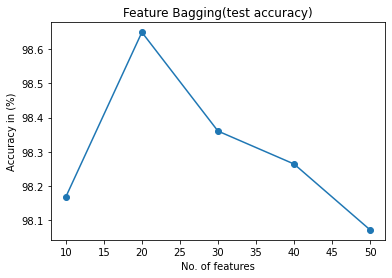

In [16]:
# Feature bagging
a2=[]
b2=[]
num_features = [10,20,30,40,50]
# Please insert your code here
for num in num_features:
    print('***********')
    print('No. of features:',num)
    # Step 1 : Create a decision tree classifier with maximum number of features in a subset (1 point)
    clf = RandomForestClassifier( max_features=num , random_state=0)
    # Step 2 : Learn the decision tree using the train set (1 point)
    clf.fit(X_train, y_train)
    # Step 3 : Compute train accuracy in % (0.5 points)
    ytrain_pred = clf.predict(X_train)
    az=(metrics.accuracy_score(y_train, ytrain_pred))
    a="{:.2%}".format(az)
    a2.append(az)
    print("Train Accuracy:",a)
    # Step 4 : Compute test accuracy in % (0.5 points)
    y_pred = clf.predict(X_val)
    bz=(metrics.accuracy_score(y_val, y_pred))
    b="{:.2%}".format(bz)
    b2.append(bz)
    print("Test Accuracy:",b)  

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
p = np.array(a2)
num_features = np.array(num_features)
q = np.array(b2)
title1 = 'Feature Bagging(train accuracy)'
title2 = 'Feature Bagging(test accuracy)'
xlabel = 'No. of features'
ylabel = 'Accuracy in (%)'
generate_line_plots(p*100 , q*100 , num_features , num_features , title1 , title2 , xlabel , ylabel)

### Comments on the effect of maximum number of features allowed on accuracy (1 point) 

---
For train accuracy , the accuracy remains 100% for any no. of features. However test accuracy first rises but then starts decreasing and is always less than training accuracy

## Number of trees in the ensemble


---
In this section, we will explore the flexibilitity to control the number of decision trees that can be a part of the Random Forest ensemble. **Comment** on the effect of the various values of the maximum number of features per subset on the train and test set accuracy inferred from their plot.


---
Total for this subsection : **5 points**

---


*********************
No. of Trees :  2
Train Accuracy: 98.55%
Test Accuracy: 95.66%
*********************
No. of Trees :  5
Train Accuracy: 99.86%
Test Accuracy: 98.17%
*********************
No. of Trees :  10
Train Accuracy: 99.90%
Test Accuracy: 98.07%
*********************
No. of Trees :  25
Train Accuracy: 100.00%
Test Accuracy: 97.97%
*********************
No. of Trees :  50
Train Accuracy: 100.00%
Test Accuracy: 98.36%


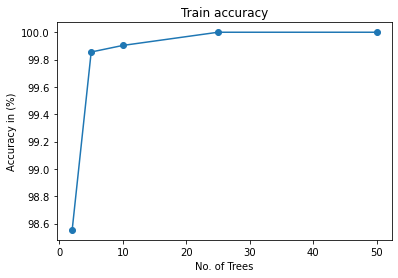

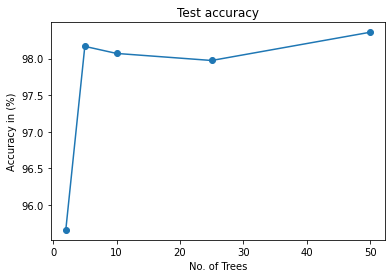

In [17]:
a3=[]
b3=[]
num_trees = [2,5,10,25,50]
# Please insert your code here
for num in num_trees:
    print('*********************')
    print('No. of Trees : ',num)
    # Step 1 : Create a decision tree classifier with the given number of trees in an ensemble (1 point)
    clf = RandomForestClassifier(n_estimators=num , random_state=0)
    # Step 2 : Learn the decision tree using the train set (1 point)
    clf.fit(X_train, y_train)
    # Step 3 : Compute train accuracy in % (0.5 points)
    ytrain_pred = clf.predict(X_train)
    az=(metrics.accuracy_score(y_train, ytrain_pred))
    a="{:.2%}".format(az)
    a3.append(az)
    print("Train Accuracy:",a)
    # Step 4 : Compute test accuracy in % (0.5 points)
    y_pred = clf.predict(X_val)
    bz=(metrics.accuracy_score(y_val, y_pred))
    b="{:.2%}".format(bz)
    b3.append(bz)
    print("Test Accuracy:",b)  
# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
p = np.array(a3)
num_features = np.array(num_features)
q = np.array(b3)
title1 = 'Train accuracy'
title2 = 'Test accuracy'
xlabel = 'No. of Trees'
ylabel = 'Accuracy in (%)'
generate_line_plots(p*100 , q*100 , num_trees , num_trees , title1 , title2 , xlabel , ylabel)

### Comments on the effect of maximum number of trees allowed on accuracy (1 point) 

---
The accuracy rises as the no. of trees increases but after a certain point it gradually decreases for test accuracy but is almost constant for train accuracy. Train accuracy is always more than test accuracy. 

# Logistic Regression

---

In this section we will apply logistic regression to classify whether malware is present or not. We will experiment with a few hyperparameters that can be flexibly tuned in the sklearn package.

## Effect of regulaization


---
Points for this subsection : **5 points**


---

In the course, we have studied two types of regularization based on the norm applied, namely L1 and L2 regularization. **Comment** on the effect of regularization applied on the accuracy based on suitable plots.



Train Accuracy: 93.13%
Test Accuracy: 90.65%
Train Accuracy: 93.03%
Test Accuracy: 90.65%
Train Accuracy: 93.03%
Test Accuracy: 90.65%


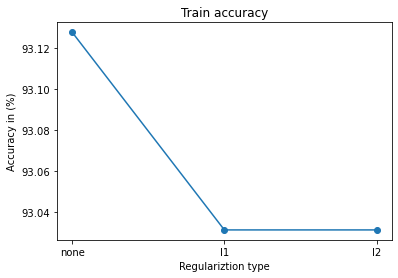

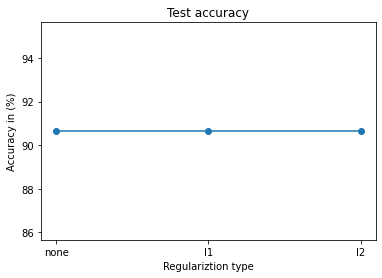

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
regularization_types = ['none','l1','l2']
r1=[]
r2=[]
train_norm = pd.DataFrame(StandardScaler().fit_transform(X_train),columns=X_train.columns)
test_norm = pd.DataFrame(StandardScaler().fit_transform(X_val),columns=X_val.columns)
# Please insert your code here
for reg_type in regularization_types:
    # Step 1 : Create a logistic regression classifier with the given regularization type (1 point)
    clf = LogisticRegression(penalty=reg_type,solver='saga',max_iter=6000)
    # Step 2 : Learn the decision tree using the train set (1 point)
    clf.fit(train_norm, y_train)
    # Step 3 : Compute train accuracy in % (0.5 points)
    ytrain_pred = clf.predict(train_norm)
    az=(metrics.accuracy_score(y_train, ytrain_pred))
    a="{:.2%}".format(az)
    r1.append(az)
    print("Train Accuracy:",a)
    # Step 4 : Compute test accuracy in % (0.5 points)
    y_pred = clf.predict(test_norm)
    bz=(metrics.accuracy_score(y_val, y_pred))
    b="{:.2%}".format(bz)
    r2.append(bz)
    print("Test Accuracy:",b) 

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
p = np.array(r1)
regulariztion_types = np.array(regularization_types)
q = np.array(r2)
title1 = 'Train accuracy'
title2 = 'Test accuracy'
xlabel = 'Regulariztion type'
ylabel = 'Accuracy in (%)'
generate_line_plots(p*100 , q*100 , regularization_types , regularization_types , title1 , title2 , xlabel , ylabel)

### Comments on the effect of regularization type on accuracy (1 point) 

---
The test accuracy is constant having no effect of regularization type whereas during training none type gives higher accuracy than l1 and l2 which gave same training accuracies.

## Effect of regularization weight


---
sklearn applies L2 regularization on its logistic regression classifier by default. There is a flexibility to tune the weight applied to this regularization term. In this section, **comment** on the effect of different values of the regularization weight parameter on the accuracy as inferred from their plot.


---

Total for this subsection : **5 points**

---






**************
Weight : 0.1
Train Accuracy: 93.06%
Test Accuracy: 91.13%
**************
Weight : 0.5
Train Accuracy: 93.06%
Test Accuracy: 91.13%
**************
Weight : 1
Train Accuracy: 93.06%
Test Accuracy: 91.13%
**************
Weight : 2
Train Accuracy: 93.06%
Test Accuracy: 91.13%
**************
Weight : 10
Train Accuracy: 93.06%
Test Accuracy: 91.13%


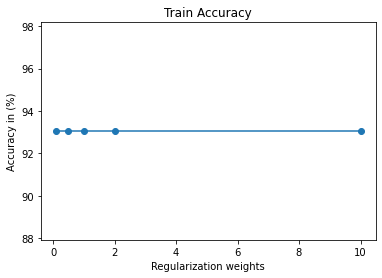

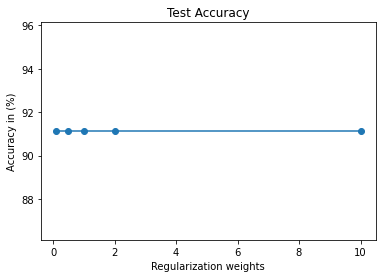

In [19]:
regularization_wts = [0.1,0.5,1,2,10]
r3=[]
r4=[]
# Please insert your code here
for wt in regularization_wts:
    print('**************')
    print('Weight :',wt)
    # Step 1 : Create a logistic regression classifier with the given regularization weight (1 point)
    clf = LogisticRegression(class_weight=wt,max_iter=4000)
    # Step 2 : Learn the decision tree using the train set (1 point)
    clf.fit(train_norm, y_train)
    # Step 3 : Compute train accuracy in % (0.5 points)
    ytrain_pred = clf.predict(train_norm)
    az=(metrics.accuracy_score(y_train, ytrain_pred))
    a="{:.2%}".format(az)
    r3.append(az)
    print("Train Accuracy:",a)
    # Step 4 : Compute test accuracy in % (0.5 points)
    y_pred = clf.predict(test_norm)
    bz=(metrics.accuracy_score(y_val, y_pred))
    b="{:.2%}".format(bz)
    r4.append(bz)
    print("Test Accuracy:",b) 

# Step 5 : Plot the trend of train and test accuracies as the hyperparameter varies (1 point)
p = np.array(r3)
regulariztion_wts = np.array(regularization_wts)
q = np.array(r4)
title1= 'Train Accuracy'
title2= 'Test Accuracy'
xlabel= 'Regularization weights'
ylabel= 'Accuracy in (%)'
generate_line_plots(p*100 , q*100 , regularization_wts , regularization_wts , title1,title2,xlabel,ylabel)

### Comments on the effect of regularization weights on accuracy (1 point) 

---
The training accuracy and test accuracy remains same for all the regularization weights.